In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:

X = train.drop(['Name',  'PassengerId', 'Ticket', 'Cabin', 'Fare', 'Embarked',"Sex", "Age"], axis =1)
Y = train['Survived']
X = X.drop(['Survived'], axis =1)
X

,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0
...,...,...,...
886,2,0,0
887,1,0,0
888,3,1,2
889,1,0,0


In [9]:
X.isna().sum()

Pclass    0
SibSp     0
Parch     0
dtype: int64

In [10]:
X_train = X.values 
Y_train = Y.values

In [11]:

Y_train = Y_train.reshape(1,X_train.shape[0])


In [12]:
X_train = X_train.T

In [13]:
print("X_train Shape", X_train.shape)
print("Y_train Shape", Y_train.shape)


X_train Shape (3, 891)
Y_train Shape (1, 891)


In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


In [15]:
m = X_train.shape[0] 
n = X_train.shape[1] #features

W = np.zeros((m,1))

In [16]:
W.shape

(3, 1)

In [17]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[0] 
    n = X_train.shape[1] #features 
    
    W = np.zeros((m,1))
    B = 0    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T,X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/n)*np.sum(Y*np.log(A) + (1-Y) *np.log(1-A))
        
        # Gradient Descent
        dW = (1/n)*np.dot(A-Y, X.T)
        dB = (1/n)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [24]:
iterations = 100000
learning_rate = 0.015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.6030890922214404
cost after  20000 iteration is :  0.6030576139776526
cost after  30000 iteration is :  0.603057573272013
cost after  40000 iteration is :  0.6030575732189318
cost after  50000 iteration is :  0.6030575732188627
cost after  60000 iteration is :  0.6030575732188624
cost after  70000 iteration is :  0.6030575732188624
cost after  80000 iteration is :  0.6030575732188624
cost after  90000 iteration is :  0.6030575732188626


In [ ]:
X_train

In [ ]:
X[X.isna()].sum()

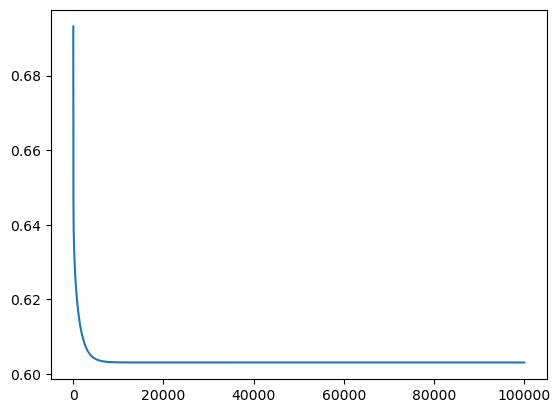

In [27]:
plt.plot(np.arange(iterations),cost_list)
plt.show()

In [28]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [32]:
X = test.drop(['Name',  'PassengerId', 'Ticket', 'Cabin', 'Fare', 'Embarked',"Sex", "Age"], axis =1)
Y = test['Pclass']
X = X.values.T
Y =Y.values.reshape(1,X.shape[1])


In [33]:
accuracy(X, Y, W, B)

Accuracy of the model is :  -97.37 %
